# Basic Concepts

Introduction to systematic/algorithmic trading.

## Russell 2000 Index

In [9]:
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
rut_df = pd.read_csv('../mock_data/RUT.csv', index_col='Date', parse_dates=True)

<Axes: title={'center': 'Adjusted Close of Russell 2000 Index'}, xlabel='Date'>

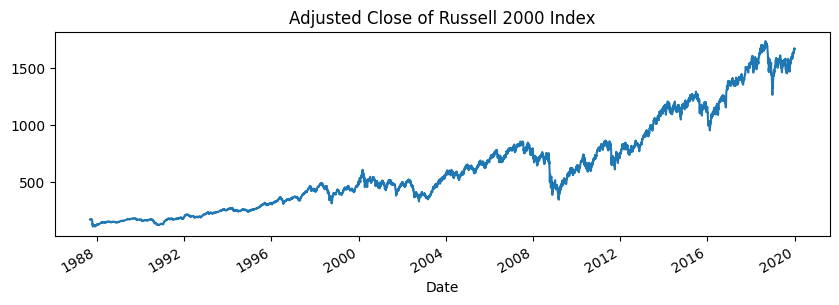

In [11]:
plt.figure(figsize=(10,3), dpi=100)
plt.title("Adjusted Close of Russell 2000 Index")
rut_df['Adj Close'].plot(kind='line')

## Sharpe Ratio

The Sharpe Ratio is a measure used to assess the risk-adjusted return of an investment or portfolio. It indicates how much excess return is received for the extra volatility (risk) endured by holding a risky asset compared to a risk-free asset.

- Formula
  - $\text{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p}$
- Where:
  - $R_p$ = Return of the portfolio or investment
  - $R_f$ = Risk-free rate (return of a risk-free asset, like government bonds)
  - $\sigma_p$ = Standard deviation of the portfolio’s excess return (a measure of risk)
- Interpretation
  - **Sharpe Ratio > 1**: Indicates a good risk-adjusted return.
  - **Sharpe Ratio = 1**: Indicates an acceptable risk-adjusted return (S&P 500)
  - **Sharpe Ratio < 1**: Indicates a poor risk-adjusted return.
  - Higher Sharpe Ratios (>2) are preferred as they imply better risk-adjusted performance.
- Limitations
  - **Assumes Normal Distribution**: The Sharpe Ratio assumes that returns are normally distributed, which may not always be the case.
  - **Ignores Skewness and Kurtosis**: It does not account for the potential for extreme events (tail risks) in the distribution of returns.
  - **Static Measure**: It is a snapshot and does not account for changes in risk or market conditions over time.

In [14]:
rut_df['Daily Return'] = rut_df['Adj Close'].pct_change(1)
rut_df = rut_df.dropna() # drops first row where Daily Return is NaN

In [16]:
rut_std = rut_df['Daily Return'].std()

0.01280172863422413

In [27]:
def compute_sharpe_ratio(
    df,
    daily_return_column="Daily Return",
    risk_free_rate: float = 0.0,
    is_annual_ratio: bool = True,
):

    mean_return = df[daily_return_column].mean()
    std = rut_df[daily_return_column].std()

    sharpe_ratio = (mean_return - risk_free_rate) / std

    return sharpe_ratio / (252 ** 0.5) if is_annual_ratio else sharpe_ratio


compute_sharpe_ratio(rut_df)

0.001788862799723217

## Sortino Ratio

The Sortino Ratio is a performance measurement tool used to evaluate the risk-adjusted return of an investment or portfolio. Unlike the Sharpe Ratio, which considers both upside and downside volatility, the Sortino Ratio focuses specifically on downside risk, providing a clearer view of the investment's performance in adverse conditions.

- **Formula**
  - $\text{Sortino Ratio} = \frac{R_p - R_t}{\sigma_d}$

- **Where:**
  - $R_p$ = Return of the portfolio or investment
  - $R_t$ = Target return (usually the risk-free rate or a minimum acceptable return)
  - $\sigma_d$ = Downside deviation (standard deviation of negative returns)

- **Interpretation**
  - **Sortino Ratio > 1**: Indicates good risk-adjusted performance considering downside risk.
  - **Sortino Ratio = 1**: Indicates an acceptable level of risk-adjusted return.
  - **Sortino Ratio < 1**: Indicates poor performance when factoring in downside risk.
  - Higher Sortino Ratios (>2) are preferred as they imply better performance relative to the risk of negative returns.

- **Advantages**
  - **Focus on Downside Risk**: By measuring only downside volatility, it provides a more accurate picture of risk for risk-averse investors.
  - **Target Return Flexibility**: Allows investors to set their own target return, making it adaptable to individual investment goals.

- **Limitations**
  - **Requires More Data**: Calculation of downside deviation requires historical return data and can be complex.
  - **Target Dependency**: The choice of the target return can significantly influence the Sortino Ratio, making comparisons across different investments potentially misleading.
  - **Ignores Upside Potential**: By focusing solely on downside risk, it may overlook positive performance in volatile markets.


In [28]:
def compute_sortino_ratio(
    df,
    daily_return_column="Daily Return",
    threshold: float=0.0,
    risk_free_rate: float = 0.0,
    is_annual_ratio: bool = True,
):

    mean_return = df[daily_return_column].mean()
    downside_std = df[df[daily_return_column] < threshold][daily_return_column].std() # only returns below threshold

    sharpe_ratio = (mean_return - risk_free_rate) / downside_std

    return sharpe_ratio / (252 ** 0.5) if is_annual_ratio else sharpe_ratio


compute_sortino_ratio(rut_df)

0.0022620404688868884